In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

In /home/fatma/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/fatma/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/fatma/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/fatma/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/fatma/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylel

In [2]:
w2v_sim_Scores_ethnicity_words_and_profane_words = pd.read_csv("Results/ethnicity_similarities/word2vec/random_words_sim_to_profane_vector.csv")
glove_wk_sim_Scores_ethnicity_words_and_profane_words = pd.read_csv("Results/ethnicity_similarities/glove-wk/random_words_sim_to_profane_vector.csv")
glove_twitter_sim_Scores_ethnicity_words_and_profane_words = pd.read_csv("Results/ethnicity_similarities/glove_twitter/random_words_sim_to_profane_vector.csv")
ud_sim_Scores_ethnicity_words_and_profane_words = pd.read_csv("Results/ethnicity_similarities/UD/random_words_sim_to_profane_vector.csv")
chan_sim_Scores_ethnicity_words_and_profane_words = pd.read_csv("Results/ethnicity_similarities/chan/random_words_sim_to_profane_vector.csv")

In [3]:
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq:
    # http://www.statsdirect.com/help/generatedimages/equations/equation154.svg
    # from:
    # http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    # All values are treated equally, arrays must be 1d:
    #print(array.shape)
    array = array.flatten()
    #print(array.shape)
    if np.amin(array) < 0:
        # Values cannot be negative:
        array -= np.amin(array)
    # Values cannot be 0:
    array += 0.0000001
    # Values must be sorted:
    array = np.sort(array)
    # Index per array element:
    index = np.arange(1,array.shape[0]+1)
    # Number of array elements:
    n = array.shape[0]
    # Gini coefficient:
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))


In [4]:
def get_sim_scores(word_list, sim_df):
    w2v_sim = []
    for i in word_list:
        if i in sim_df["words"].values:
            w2v_sim.append(sim_df[sim_df["words"] == i]["sim_score"].values[0])
        else:
            w2v_sim.append(0)
    return w2v_sim

In [22]:
w2v_sim_Scores_ethnicity_words_and_profane_words.columns

Index(['Unnamed: 0', 'words', 'sim_score'], dtype='object')

In [23]:
data_folder = "../../Data/"

In [20]:
random_words = ['and', 'but', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',
               "time", "year", "people", "day", "child", "work", "life", "thing", "world", "way", "back"]

In [24]:
all_data_dict = {}
words = random_words
w2v_sim = get_sim_scores(random_words, w2v_sim_Scores_ethnicity_words_and_profane_words)
glove_wk_sim_scores = get_sim_scores(random_words, glove_wk_sim_Scores_ethnicity_words_and_profane_words)
glove_twitter_sim_Scores = get_sim_scores(random_words, glove_twitter_sim_Scores_ethnicity_words_and_profane_words)
ud_sim_scores = get_sim_scores(random_words, ud_sim_Scores_ethnicity_words_and_profane_words)
chan_sim_scores = get_sim_scores(random_words, chan_sim_Scores_ethnicity_words_and_profane_words)

In [25]:
all_data_dict["ethnicity_word"] = words
all_data_dict["w2v_sim"] = w2v_sim
all_data_dict["glove_wk_sim"] = glove_wk_sim_scores
all_data_dict["glove_twitter_sim"] = glove_twitter_sim_Scores
all_data_dict["ud_sim"] = ud_sim_scores
all_data_dict["chan_sim"] = chan_sim_scores

(array([5., 7., 4., 4., 2., 6., 0., 0., 0., 1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

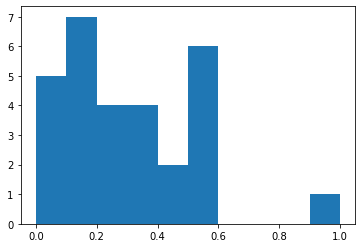

In [26]:
plt.hist(all_data_dict["w2v_sim"])

In [27]:
all_data_df = pd.DataFrame(all_data_dict)

In [28]:
empty_all_data_df = all_data_df[(all_data_df["w2v_sim"]==0) &
                                (all_data_df["glove_wk_sim"]==0) &
                                (all_data_df["glove_twitter_sim"]==0) &
                                (all_data_df["ud_sim"]==0) &
                                (all_data_df["chan_sim"]==0)]
all_data_df = all_data_df[~all_data_df.index.isin(empty_all_data_df.index)]

In [29]:
len(empty_all_data_df), len(all_data_df)

(0, 29)

In [30]:
all_data_df.to_csv("Results/all_WE_random_words_sim_to_profane_vector.csv")

In [31]:
all_data_df.mean()

w2v_sim              0.300551
glove_wk_sim         0.229659
glove_twitter_sim    0.499074
ud_sim               0.541753
chan_sim             0.414586
dtype: float64

In [32]:
all_data_df.columns

Index(['ethnicity_word', 'w2v_sim', 'glove_wk_sim', 'glove_twitter_sim',
       'ud_sim', 'chan_sim'],
      dtype='object')

In [33]:
from scipy.stats import wilcoxon,spearmanr,ttest_ind,ks_2samp

print(wilcoxon(all_data_df["w2v_sim"], all_data_df["glove_wk_sim"],alternative='two-sided'))
print(wilcoxon(all_data_df["w2v_sim"], all_data_df["glove_twitter_sim"],alternative='two-sided'))
print(wilcoxon(all_data_df["w2v_sim"], all_data_df["ud_sim"],alternative='two-sided'))
print(wilcoxon(all_data_df["w2v_sim"], all_data_df["chan_sim"],alternative='two-sided'))

WilcoxonResult(statistic=91.0, pvalue=0.010759956613475967)
WilcoxonResult(statistic=56.0, pvalue=0.000815736363503868)
WilcoxonResult(statistic=62.0, pvalue=0.0007726592908711714)
WilcoxonResult(statistic=116.0, pvalue=0.028181182907209452)


In [34]:
print(wilcoxon(all_data_df["glove_wk_sim"], all_data_df["w2v_sim"],alternative='two-sided'))
print(wilcoxon(all_data_df["glove_wk_sim"], all_data_df["glove_twitter_sim"],alternative='two-sided'))
print(wilcoxon(all_data_df["glove_wk_sim"], all_data_df["ud_sim"],alternative='two-sided'))
print(wilcoxon(all_data_df["glove_wk_sim"], all_data_df["chan_sim"],alternative='two-sided'))

WilcoxonResult(statistic=91.0, pvalue=0.010759956613475967)
WilcoxonResult(statistic=29.0, pvalue=7.425368123953551e-05)
WilcoxonResult(statistic=50.0, pvalue=0.00029246278606886)
WilcoxonResult(statistic=65.0, pvalue=0.0009753641365557983)


In [35]:
print(wilcoxon(all_data_df["glove_twitter_sim"], all_data_df["w2v_sim"],alternative='two-sided'))
print(wilcoxon(all_data_df["glove_twitter_sim"], all_data_df["glove_wk_sim"],alternative='two-sided'))
print(wilcoxon(all_data_df["glove_twitter_sim"], all_data_df["ud_sim"],alternative='two-sided'))
print(wilcoxon(all_data_df["glove_twitter_sim"], all_data_df["chan_sim"],alternative='two-sided'))

WilcoxonResult(statistic=56.0, pvalue=0.000815736363503868)
WilcoxonResult(statistic=29.0, pvalue=7.425368123953551e-05)
WilcoxonResult(statistic=186.0, pvalue=0.4957887064737012)
WilcoxonResult(statistic=147.0, pvalue=0.1273999122001946)


In [36]:
print(wilcoxon(all_data_df["ud_sim"], all_data_df["w2v_sim"],alternative='two-sided'))
print(wilcoxon(all_data_df["ud_sim"], all_data_df["glove_wk_sim"],alternative='two-sided'))
print(wilcoxon(all_data_df["ud_sim"], all_data_df["glove_twitter_sim"],alternative='two-sided'))
print(wilcoxon(all_data_df["ud_sim"], all_data_df["chan_sim"],alternative='two-sided'))

WilcoxonResult(statistic=62.0, pvalue=0.0007726592908711714)
WilcoxonResult(statistic=50.0, pvalue=0.00029246278606886)
WilcoxonResult(statistic=186.0, pvalue=0.4957887064737012)
WilcoxonResult(statistic=124.0, pvalue=0.04320018979244315)


In [37]:
print(wilcoxon(all_data_df["chan_sim"], all_data_df["w2v_sim"],alternative='two-sided'))
print(wilcoxon(all_data_df["chan_sim"], all_data_df["glove_wk_sim"],alternative='two-sided'))
print(wilcoxon(all_data_df["chan_sim"], all_data_df["glove_twitter_sim"],alternative='two-sided'))
print(wilcoxon(all_data_df["chan_sim"], all_data_df["ud_sim"],alternative='two-sided'))

WilcoxonResult(statistic=116.0, pvalue=0.028181182907209452)
WilcoxonResult(statistic=65.0, pvalue=0.0009753641365557983)
WilcoxonResult(statistic=147.0, pvalue=0.1273999122001946)
WilcoxonResult(statistic=124.0, pvalue=0.04320018979244315)
